In [46]:
%matplotlib inline
import cv2 # tested with the 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.misc
import matplotlib

# 1. Basic Image Operations
## 1.1 Image Read/Write

In [37]:
# a) read image.
def my_imread(imagepath):    
    image = cv2.imread(imagepath) # Read the image from imagepath.
    return image

IMG_NAME = '12084.jpg' # Choose an image filename from "data/img/"
IMG_PATH = os.path.join('data/img/', IMG_NAME)
image = my_imread(IMG_PATH)

In [38]:
# Optional: uncomment those lines to display the image using cv2.
#cv2.imshow('image', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

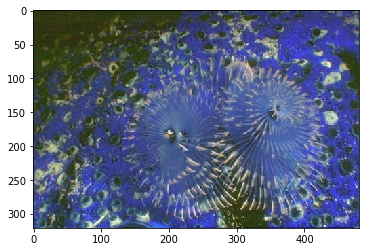

In [39]:
# Optional: uncomment those lines to display the correct color 
# image using pyplot
plt.imshow(image) 

In [49]:
# b) Write the same image in RGB and Grayscale and save as
# "problem1_rgb.jpg" and "problem1_gray.jpg".
RGB_FILENAME = "problem1_rgb.jpg"
GRAY_FILENAME = "problem1_gray.jpg"

def convert2RGB(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def convert2Gray(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

def writeToFile(filename,image,gray='False'):
    #scipy.misc.imsave(filename, image)
    if not gray:
        matplotlib.image.imsave(filename,image)
    else:
        matplotlib.image.imsave(filename,image,cmap='gray')

rgb_image = convert2RGB(image)
writeToFile(RGB_FILENAME,rgb_image)

gray_image = convert2Gray(image)
writeToFile(GRAY_FILENAME,gray_image)

# Once the two images have been generated in the current directory,
# run the next block to show your results.

### Display saved RGB image from current folder.
!["rgb"](problem1_rgb.jpg)

### Display saved grayscale image from current folder.
!["gray"](problem1_gray.jpg)

## 1.2 Image Smoothing

In [50]:
# Optional: plots an image
def plot_helper(rgb_img, title):
    plt.figure(figsize=(15, 15)) # the figure size can be adjusted to make sure the images are clear for grading.
    plt.subplot(111), 
    plt.imshow(rgb_img), 
    plt.title(title)
    plt.xticks([]), 
    plt.yticks([])
    plt.show()

kernel sizes are: [3, 7, 11]


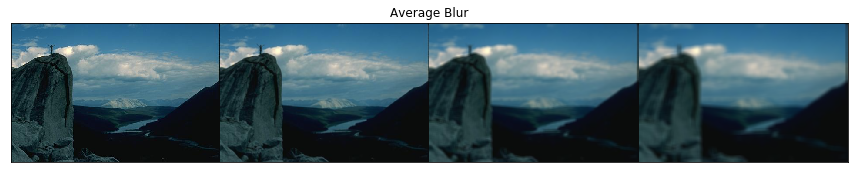

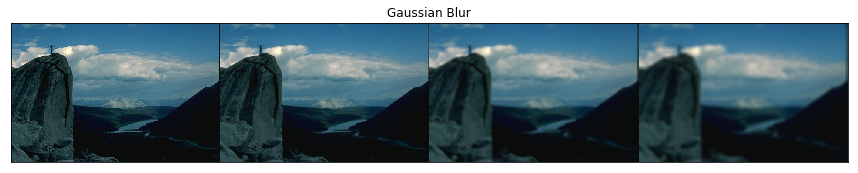

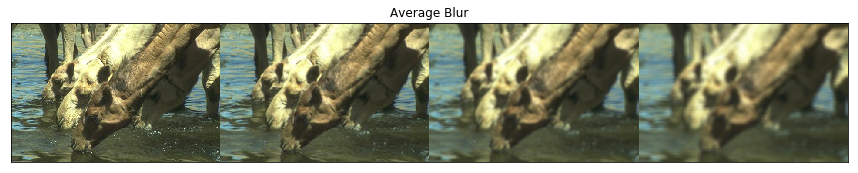

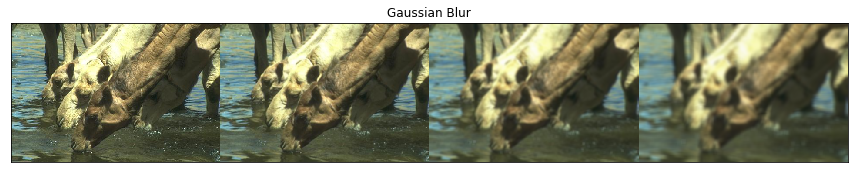

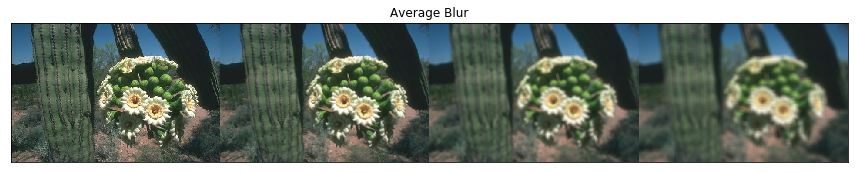

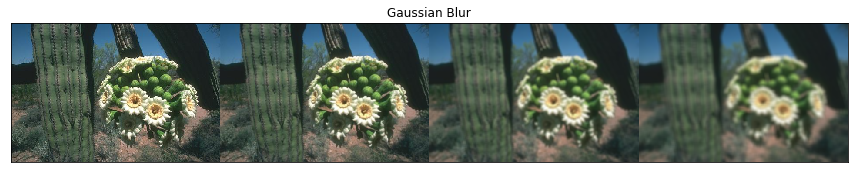

In [52]:
IMAGES = ['14037.jpg', '16077.jpg', '19021.jpg'] # choose 3 images from "data/img"
KERNEL_SIZES = [3, 7, 11] # choose at least 3 different filter sizes
print "kernel sizes are:", KERNEL_SIZES
for i in range(len(IMAGES)):
    imagepath = os.path.join('data/img/', IMAGES[i])
    image = my_imread(imagepath)
    avg_blurs = [convert2RGB(image)]
    gaus_blurs = [convert2RGB(image)]
    for j in range(len(KERNEL_SIZES)):
        kernel_size = KERNEL_SIZES[j]
        # a) average smoothing
        avg_blur = convert2RGB(cv2.blur(image, (kernel_size,kernel_size)))
        avg_blurs.append(avg_blur)
        # b) gaussian smoothing
        gaus_blur = convert2RGB(cv2.GaussianBlur(image, (kernel_size,kernel_size), kernel_size/2))
        gaus_blurs.append(gaus_blur)
    avg_stack = np.hstack(avg_blurs)
    gaus_stack = np.hstack(gaus_blurs)
    # Optional: you could choose to use plot_helper to plot avg_stack and gaus_stack.
    # Make sure they are in RGB before using plot_helper.
    plot_helper(avg_stack, "Average Blur")
    plot_helper(gaus_stack, "Gaussian Blur")
    

### c) What do you observe? (Please briefly answer this question in this block)
From the figures, it appears that Gaussian blurring still maintains more clarity in the smoothed imaged, while Average smoothing blurs the image to more extent. This may be because gaussian smoothing still weighs things in the center more than than on the edges. Also due to its equal-weighing-in-a-block scheme, the output of the average smoothing is also a little blocky. Apart from that as we increase the kernel size, the blurring increases in both the smoothing techniques.

## 1.3 Denoising

In [53]:
import glob
imagepaths = glob.glob('data/snp/*.jpg')

Filter size 1


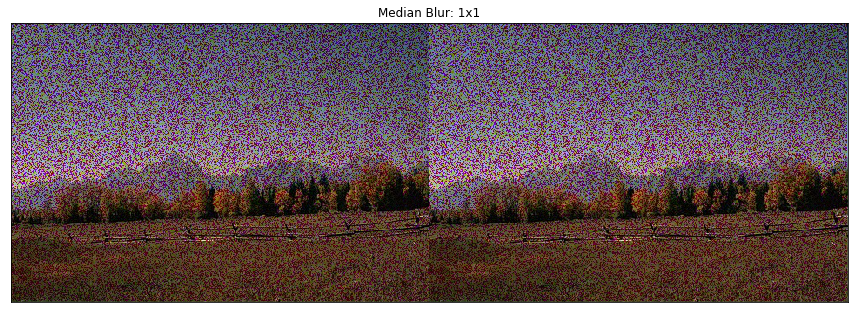

Filter size 3


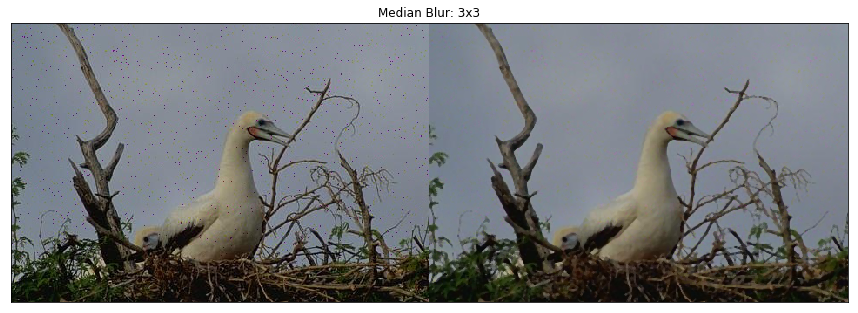

Filter size 5


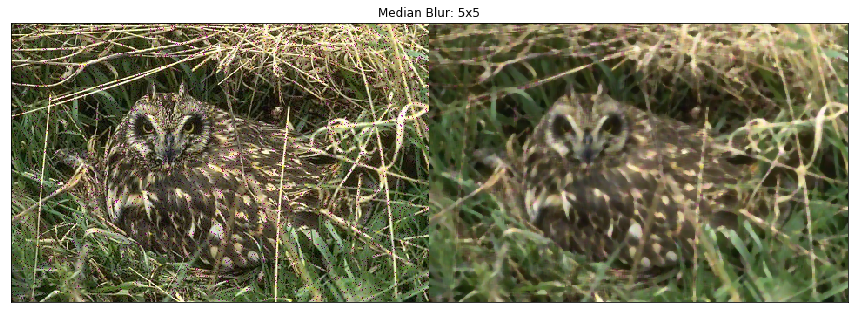

Filter size 7


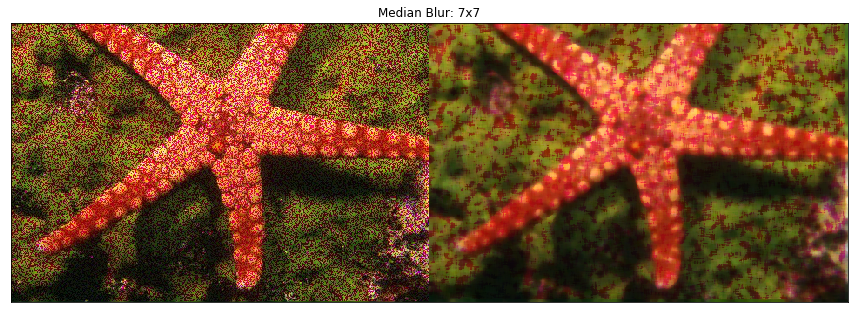

Filter size 9


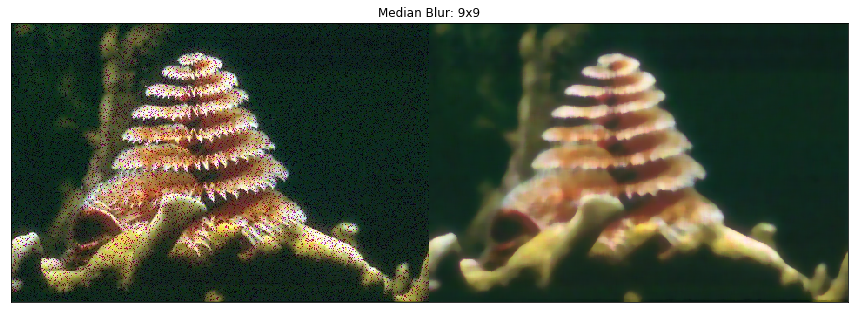

In [59]:
MEDIAN_FILTERS = [1, 3, 5, 7, 9] # Filter sizes for each image.
for i, imagepath in enumerate(imagepaths):
    image = my_imread(imagepath)
    print "Filter size", MEDIAN_FILTERS[i]
    median = convert2RGB(cv2.medianBlur(image,MEDIAN_FILTERS[i])) # Apply the median filter on this image.
    stack = np.hstack((convert2RGB(image), median))
    # Optional: you could choose to use plot_helper to plot stacked image.
    # Make sure it is in RGB before using plot_helper.
    plot_helper(stack, 'Median Blur: %dx%d'%(MEDIAN_FILTERS[i], MEDIAN_FILTERS[i]))